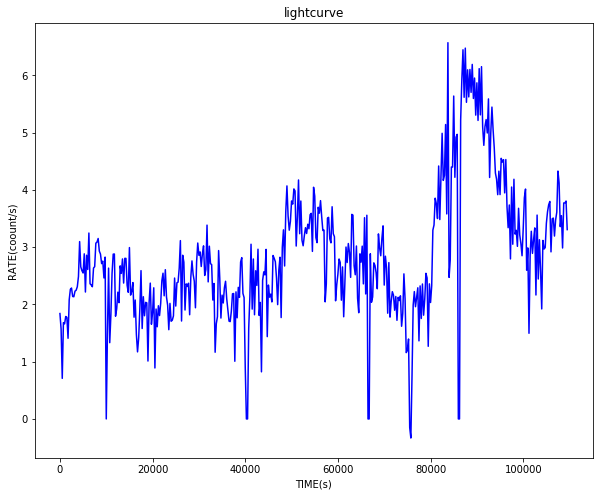

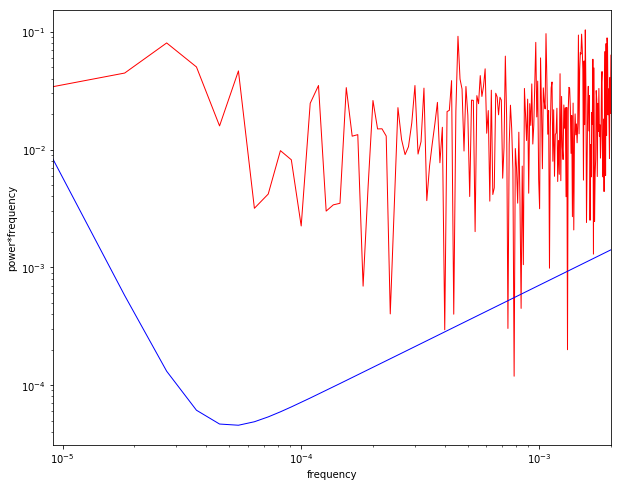

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
'''
#fft说明
yy=fft(f)           #快速傅里叶变换
yreal = yy.real     # 获取实数部分
yimag = yy.imag     # 获取虚数部分
'''
#光变曲线
'''
beta = 2.0   #用于检验的beta值为 1.0 or 2.0
N = 1024
dt=1
omega = []
POW = []
DFT = []
fr = []
fi = []
f1 = []
f2 = []
counts = []
p = []
f = []
for j in range(1,int(N)+1):
    omega.append(j/(N*dt))
    POW.append((1/omega[-1])**beta)
    DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
    s1=np.random.normal(loc=0.0, scale=1.0, size=None)
    s2=np.random.normal(loc=0.0, scale=1.0, size=None)
    fr.append((DFT[-1].real)*s1)
    fi.append((DFT[-1].imag)*s2)
    f1.append(complex(fr[-1],fi[-1]))


a=512
for j in range(1,int(N)//2+1):
    a=a-1
    f2.append(complex(fr[a],-fi[a]))


f0=[0]
f.extend(f2)
f.extend(f0)
f.extend(f1)


counts = ifft(f1)
t = np.arange(len(counts))


'''
data = pd.read_csv("091_0.2_10(2).csv")  
dt=250
counts = data['RATE']
N=len(counts)
pnum = np.arange(len(counts))
t = [i*dt for i in pnum]
plt.figure(figsize=(10,8))
plt.plot(t,counts,'b')
plt.xlabel("TIME(s)")
plt.ylabel("RATE(coount/s)")
plt.title("lightcurve")
plt.show()    
#周期图
nf = N/2
df = 1/(dt*N)
F_num = np.arange(1,nf)
F = [i*df for i in F_num]
mean_x = np.mean(counts)
dft = fft(counts)
dft1= dft[1:int(nf+1)]
per = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f = np.multiply(np.array(F),np.array(per))

f_b=5E-6
alpha_H=5.0
alpha_L=1.0
P = [((i**(-alpha_L))/(1+(i/f_b)**(alpha_H-alpha_L)))*0.1+2/mean_x for i in F]
   ###将模型POWER加上泊松噪声项可以较好地拟合出周期图结果，但是直接在周期图上减去泊松噪声项得到的仍然是不太好的结果
P_TIMES_F = np.multiply(np.array(F),np.array(P))


plt.figure(figsize=(10,8))
plt.loglog(F,p_times_f,color="r",linewidth=1)
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)  
plt.xlim(F[0],F[-1])
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.show()